In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 

In [171]:
df = pd.read_csv("germany_2024.csv", index_col=0, parse_dates=True)

In [172]:
df['valid_time'] = pd.to_datetime(df['valid_time'])

df = df.sort_values('valid_time')

df = df[['valid_time', 'wind_speed', 'ssrd_wm2']]

In [173]:
# Defination of the dunkelflaute period with absolute no production in this cases 
df['low_wind'] = df['wind_speed'] < 3
df['low_solar'] = df['ssrd_wm2'] < 70
# Combined Dunkelflaute condition
df['dunkelflaute'] = df['low_wind'] & df['low_solar']


In [174]:
df['block'] = (df['dunkelflaute'] != df['dunkelflaute'].shift()).cumsum()

events = df[df['dunkelflaute']].groupby('block').agg(start=('valid_time', 'min'),
                                                      end=('valid_time', 'max'),
                                                      duration_hours=('valid_time',lambda x:len(x))).reset_index(drop=True)

events = events[events['duration_hours'] >= 36] 

print(len(events))

6


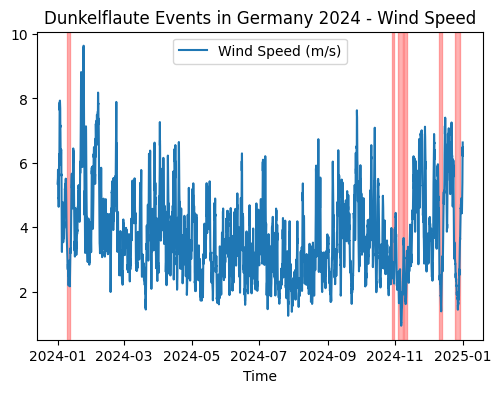

In [175]:
# Plot data for a events of interest
plt.figure(figsize=(5.75,4))
plt.plot(df['valid_time'], df['wind_speed'], label='Wind Speed (m/s)')
for _, event in events.iterrows():
    plt.axvspan(event['start'], event['end'], color='red', alpha=0.3)
plt.title("Dunkelflaute Events in Germany 2024 - Wind Speed")
plt.xlabel("Time")
plt.legend()
plt.savefig("WindSpeed_events_2024.png", dpi=300) 
plt.show()



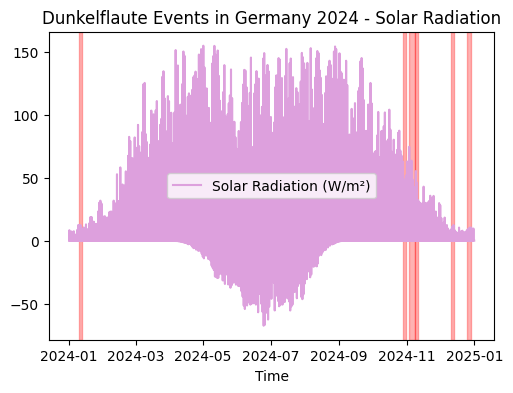

In [176]:
# Plot data for a events of interest
plt.figure(figsize=(5.75,4))
#plt.plot(df['valid_time'], df['wind_speed'], label='Wind Speed (m/s)')
plt.plot(df['valid_time'], df['ssrd_wm2'], label='Solar Radiation (W/m²)',color='plum')
for _, event in events.iterrows():
    plt.axvspan(event['start'], event['end'], color='red', alpha=0.3)
plt.title("Dunkelflaute Events in Germany 2024 - Solar Radiation")
plt.xlabel("Time")
plt.legend()
plt.savefig("Solarirr_dunkelflaute_2024.png", dpi=300)
plt.show()


In [177]:
print(events)
save_path = "Near_dunkelflaute_events_2024.csv"
events.to_csv(save_path, index=False)
print(f"Dunkelflaute events saved to {save_path}")

                  start                 end  duration_hours
0   2024-01-09 22:00:00 2024-01-12 10:00:00              61
220 2024-10-28 23:00:00 2024-10-31 08:00:00              58
222 2024-11-03 07:00:00 2024-11-08 07:00:00             121
223 2024-11-08 22:00:00 2024-11-11 08:00:00              59
233 2024-12-10 21:00:00 2024-12-13 08:00:00              60
236 2024-12-25 00:00:00 2024-12-29 03:00:00             100
Dunkelflaute events saved to Near_dunkelflaute_events_2024.csv
